# RFM Analysis in Python

## Introduction

> Customer segmentation is the process by which we divide customers into groups based on common characteristics like demographics (age, gender, income, etc.), geography, psychology, and behavior. The main aim of customer segmentation is to identify different groups of customers so that specific groups can be targeted and marketed with particular plans.

> RFM analysis is a method for customer segmentation that groups customers based on their past purchase behavior. RFM stands for three key customer traits, i.e., Recency of purchase, Frequency of purchase, and Monetary value of purchase.

## Project Objective

> The aim of the project is to analyse the required variables in a transactional dataset, which are needed to perform RFM Analysis. And finally creating different customer groups or segments using the transactional data.

## 1. Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## 2. Exploring the transactional dataset

In [2]:
df = pd.read_csv("online_retail_dataset.csv")

In [3]:
df.head()

,Country,Customer ID,Description,Invoice Date,Item Code,Invoice ID,No of Rows,Unit Price,Quantity,Sales Amount
0,Australia,12415,BISCUIT TIN VINTAGE RED,03-03-2011,22842,545475,1,5.95,48,285.6
1,Australia,12415,ROUND CAKE TIN VINTAGE GREEN,03-03-2011,22841,545475,1,6.95,36,250.2
2,Australia,12415,ROUND CAKE TIN VINTAGE RED,03-03-2011,22840,545475,1,6.95,36,250.2
3,Australia,12415,3 TIER CAKE TIN RED AND CREAM,03-03-2011,22838,545475,1,14.95,20,299.0
4,Australia,12415,3 TIER CAKE TIN GREEN AND CREAM,03-03-2011,22839,545475,1,12.75,32,408.0


In [4]:
df.tail()

,Country,Customer ID,Description,Invoice Date,Item Code,Invoice ID,No of Rows,Unit Price,Quantity,Sales Amount
146125,United Kingdom,14178,GARDENERS KNEELING PAD CUP OF TEA,19-07-2011,23300,560555,1,1.65,2,3.30
146126,United Kingdom,14178,PINK DOUGHNUT TRINKET POT,19-07-2011,22064,560555,1,1.65,2,3.30
146127,United Kingdom,14178,SCANDINAVIAN PAISLEY PICNIC BAG,19-07-2011,21932,560555,1,1.65,2,3.30
146128,United Kingdom,16764,LUNCH BAG SPACEBOY DESIGN,19-07-2011,22382,560601,1,1.65,2,3.30
146129,United Kingdom,15867,YOU'RE CONFUSING ME METAL SIGN,19-07-2011,21169,560579,1,1.69,2,3.38


In [5]:
df.shape

(146130, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146130 entries, 0 to 146129
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Country       146130 non-null  object 
 1   Customer ID   146130 non-null  int64  
 2   Description   146130 non-null  object 
 3   Invoice Date  146130 non-null  object 
 4   Item Code     146130 non-null  object 
 5   Invoice ID    146130 non-null  int64  
 6   No of Rows    146130 non-null  int64  
 7   Unit Price    146130 non-null  float64
 8   Quantity      146130 non-null  int64  
 9   Sales Amount  146130 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 11.1+ MB


In [7]:
df.isnull().sum()

Country         0
Customer ID     0
Description     0
Invoice Date    0
Item Code       0
Invoice ID      0
No of Rows      0
Unit Price      0
Quantity        0
Sales Amount    0
dtype: int64

In [8]:
df.Country.value_counts()

United Kingdom          129602
Germany                   3610
France                    3021
EIRE                      2497
Spain                     1060
Netherlands                856
Belgium                    727
Switzerland                676
Australia                  618
Portugal                   535
Finland                    360
Channel Islands            265
Italy                      255
Cyprus                     220
Unspecified                212
Japan                      198
Singapore                  188
Sweden                     188
Poland                     188
Austria                    171
Greece                     109
Norway                     104
Canada                      89
Denmark                     75
Iceland                     53
Lebanon                     45
Israel                      43
European Community          40
Brazil                      32
United Arab Emirates        30
USA                         22
Bahrain                     17
Czech Re

In [9]:
df.describe()

,Customer ID,Invoice ID,No of Rows,Unit Price,Quantity,Sales Amount
count,146130.000000,146130.000000,146130.0,146130.000000,146130.000000,146130.000000
mean,15244.132711,549881.611360,1.0,3.255783,13.677349,22.993014
std,1726.232274,6313.232779,0.0,25.855016,199.682247,215.440885
min,12346.000000,539993.000000,1.0,0.000000,1.000000,0.000000
25%,13771.000000,544691.000000,1.0,1.250000,2.000000,5.040000
50%,15061.000000,549153.000000,1.0,1.950000,6.000000,12.750000
75%,16771.000000,553863.000000,1.0,3.750000,12.000000,19.800000
max,18287.000000,561903.000000,1.0,8142.750000,74215.000000,77183.600000


In [31]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'],errors='ignore')

In [11]:
PRESENT = dt.datetime(2011,7,31)

In [12]:
df.head()

,Country,Customer ID,Description,Invoice Date,Item Code,Invoice ID,No of Rows,Unit Price,Quantity,Sales Amount
0,Australia,12415,BISCUIT TIN VINTAGE RED,2011-03-03,22842,545475,1,5.95,48,285.6
1,Australia,12415,ROUND CAKE TIN VINTAGE GREEN,2011-03-03,22841,545475,1,6.95,36,250.2
2,Australia,12415,ROUND CAKE TIN VINTAGE RED,2011-03-03,22840,545475,1,6.95,36,250.2
3,Australia,12415,3 TIER CAKE TIN RED AND CREAM,2011-03-03,22838,545475,1,14.95,20,299.0
4,Australia,12415,3 TIER CAKE TIN GREEN AND CREAM,2011-03-03,22839,545475,1,12.75,32,408.0


## 3. Creating new dataframe with 3 new variables measuring recency, frequency and monetary value of purchase

In [13]:
rfm= df.groupby('Customer ID').agg({'Invoice Date': lambda date: (PRESENT - date.max()).days,
                                        'Invoice ID': pd.Series.nunique,
                                        'Sales Amount': lambda price: price.sum()})

In [14]:
rfm.columns

Index(['Invoice Date', 'Invoice ID', 'Sales Amount'], dtype='object')

In [15]:
rfm.columns=['recency','frequency','monetary']

In [16]:
rfm['recency'] = rfm['recency'].astype(int)
rfm['frequency'] = rfm['frequency'].astype(int)

In [17]:
rfm.head()

,recency,frequency,monetary
Customer ID,,,
12346,194,1,77183.60
12347,27,2,1111.64
12348,88,2,594.44
12350,179,1,334.40
12352,131,5,1561.81


## 4. Calculating RFM Scores

In [18]:
rfm['r_score'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_score'] = pd.qcut(rfm['frequency'], 4, ['3','2','1'], duplicates="drop")
rfm['m_score'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [19]:
rfm['rfm_score'] = rfm.r_score.astype(str)+ rfm.f_score.astype(str) + rfm.m_score.astype(str)
rfm.head()

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
Customer ID,,,,,,,
12346,194,1,77183.60,4,3,1,431
12347,27,2,1111.64,2,3,1,231
12348,88,2,594.44,3,3,2,332
12350,179,1,334.40,4,3,3,433
12352,131,5,1561.81,4,1,1,411


In [20]:
rfm['r_score'] = rfm['r_score'].astype(int)
rfm['f_score'] = rfm['f_score'].astype(int)
rfm['m_score'] = rfm['m_score'].astype(int)
rfm['rfm_score'] = rfm['rfm_score'].astype(int)

In [21]:
rfm.tail()

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
Customer ID,,,,,,,
18272,-129,3,1734.20,1,2,1,121
18273,126,1,51.00,4,3,4,434
18280,28,1,180.60,2,3,4,234
18283,17,7,678.24,2,1,2,212
18287,70,1,765.28,3,3,2,332


In [22]:
#segment = [0]*len(rfm)

#best = list(rfm.loc[rfm['rfm_score']=='111'].index)
#potential_to_become_best = list([rfm.loc[rfm['r_score']=='1'] | rfm.loc[rfm['f_Score']=='2'] | rfm.loc[rfm['m_Score']<='2']].index)
#loyal = list(rfm.loc[rfm['f_score']=='1'].index)
#big_spender = list(rfm.loc[rfm['m_score']=='1'].index)
#almost_lost = list(rfm.loc[rfm['rfm_score']=='311'].index)
#lost = list(rfm.loc[rfm['rfm_score']=='411'].index)
#lost_cheap = list(rfm.loc[rfm['rfm_score']=='434'].index)
#lookout = list(rfm.loc[rfm['r_score']=='2'].index)
#occasional = list([rfm.loc[rfm['r_score']>='2'] | rfm.loc[rfm['f_score']>='2'] ].index)

#for i in range(0,len(rfm)):
    #if rfm['rfm_score'][i]=='111':
        #segment[i]='Best Customer'
    #elif rfm['r_score'][i]=='1' and rfm['f_Score'][i]=='2' and rfm['m_Score'][i]<='2':
        #segment[i]='Potential To Become Best Customer'    
    #elif rfm['f_score'][i]=='1':
        #segment[i]='Loyal Customer'
    #elif rfm['m_score'][i]=='1':
        #segment[i]='Big Spenders'
    #elif rfm['rfm_score'][i]=='311':
        #segment[i]='Almost Lost'
    #elif rfm['rfm_score'][i]=='411':
        #segment[i]='Lost Customer'
    #elif rfm['rfm_score'][i]=='434':
        #segment[i]='Lost Cheap Customer'
    #elif rfm['r_score'][i]=='2':
        #segment[i]='Look Out Buyers'
    #elif rfm['r_score'][i]>='2' and rfm['f_score'][i]>='2':
        #segment[i]='Occasional Buyers'    
    #else:
        #segment[i]='Others'

#rfm['segment'] = segment

## 5. Creating customer segments based on RFM Scores

In [23]:
segments = []

for r,f,m,r_f_m in zip(rfm['r_score'].to_numpy(),rfm['f_score'].to_numpy(),rfm['m_score'].to_numpy(),rfm['rfm_score'].to_numpy()):
    if (r_f_m == 111):
        segments.append("Best Customer")
    elif (r_f_m == 1) and (f == 2) and (m <= 2):
        segments.append("Potential To Become Best Customer")    
    elif (f == 1):
        segments.append("Loyal Customer")
    elif (m == 1):
        segments.append("Big Spenders")
    elif (r_f_m == 311):
        segments.append("Almost Lost")
    elif (r_f_m == 411):
        segments.append("Lost Customer")
    elif (r_f_m == 434):
        segments.append("Lost Cheap Customer") 
    elif (r == 2):
        segments.append("Look Out Buyers")
    elif (r >= 2) and (f >= 2):
        segments.append("Occasional Buyers")    
    else:
        segments.append('Others')
    

rfm['Segment'] = segments

In [24]:
rfm.head()

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,Segment
Customer ID,,,,,,,,
12346,194,1,77183.60,4,3,1,431,Big Spenders
12347,27,2,1111.64,2,3,1,231,Big Spenders
12348,88,2,594.44,3,3,2,332,Occasional Buyers
12350,179,1,334.40,4,3,3,433,Occasional Buyers
12352,131,5,1561.81,4,1,1,411,Loyal Customer


## 6. Analysing the customer segments

In [25]:
rfm.Segment.value_counts()

Occasional Buyers      884
Look Out Buyers        410
Others                 346
Loyal Customer         302
Lost Cheap Customer    286
Big Spenders           256
Best Customer          232
Name: Segment, dtype: int64

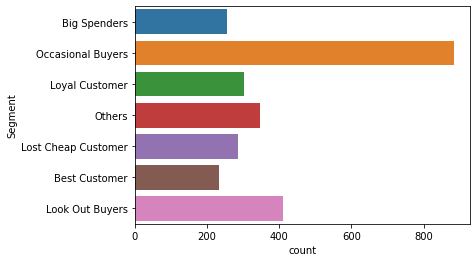

In [26]:
z = sns.countplot(y= 'Segment', data=rfm)

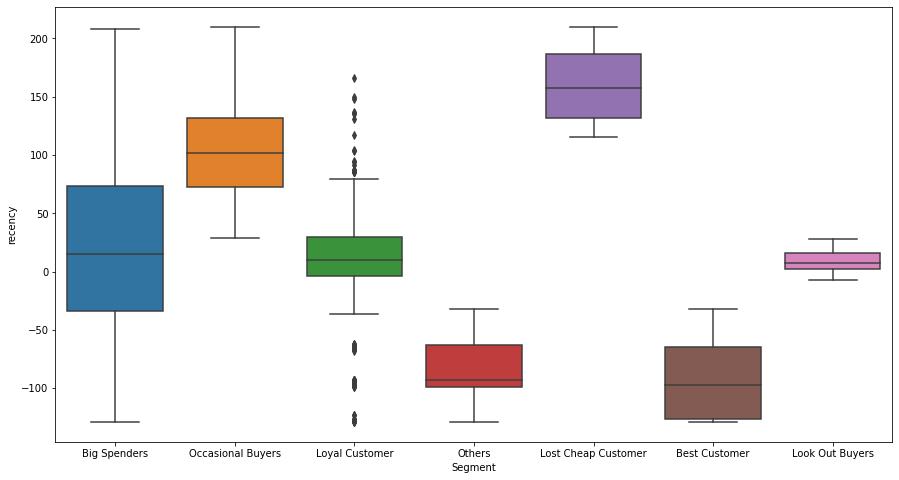

In [27]:
plt.figure(figsize=(15,8))
z = sns.boxplot(data=rfm, x='Segment', y='recency')

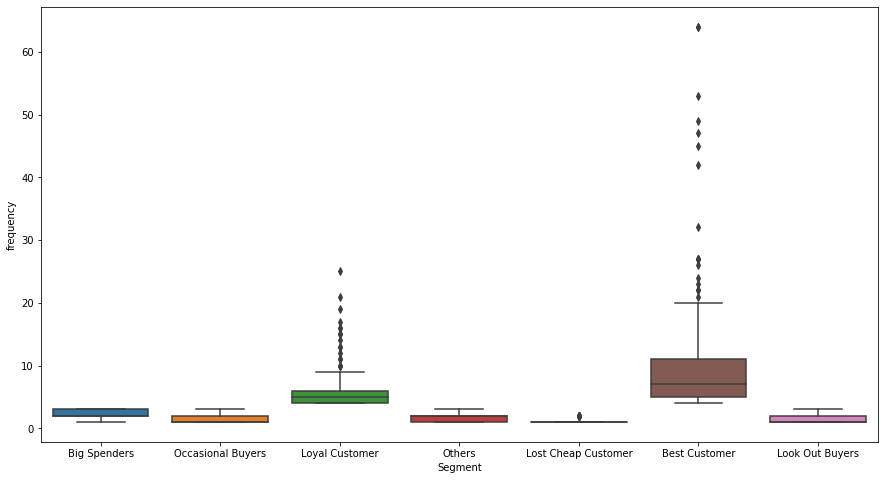

In [28]:
plt.figure(figsize=(15,8))
z = sns.boxplot(data=rfm, x='Segment', y='frequency')

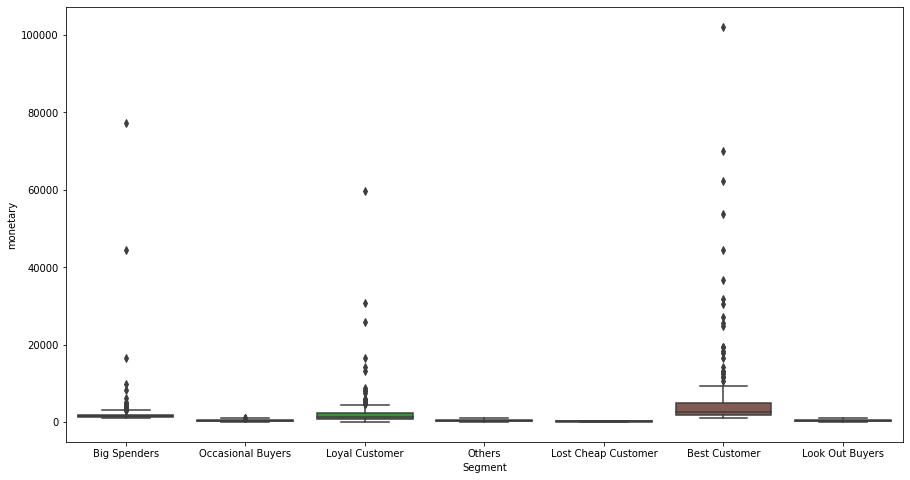

In [29]:
plt.figure(figsize=(15,8))
z = sns.boxplot(data=rfm, x='Segment', y='monetary')

In [30]:
# Merging rfm data with initial dataset

df1 = pd.merge(df, rfm['Segment'], on='Customer ID')
df1.head()

,Country,Customer ID,Description,Invoice Date,Item Code,Invoice ID,No of Rows,Unit Price,Quantity,Sales Amount,Segment
0,Australia,12415,BISCUIT TIN VINTAGE RED,2011-03-03,22842,545475,1,5.95,48,285.6,Best Customer
1,Australia,12415,ROUND CAKE TIN VINTAGE GREEN,2011-03-03,22841,545475,1,6.95,36,250.2,Best Customer
2,Australia,12415,ROUND CAKE TIN VINTAGE RED,2011-03-03,22840,545475,1,6.95,36,250.2,Best Customer
3,Australia,12415,3 TIER CAKE TIN RED AND CREAM,2011-03-03,22838,545475,1,14.95,20,299.0,Best Customer
4,Australia,12415,3 TIER CAKE TIN GREEN AND CREAM,2011-03-03,22839,545475,1,12.75,32,408.0,Best Customer
